# First-stage EDA

### import necessary package

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rdgn = sns.diverging_palette(240, 10, n = 9, as_cmap=True)


# Get the current working directory (assuming the notebook is in the same directory as the file)
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_directory)

import sys
sys.path.append(parent_directory)
from py_scripts.utils import data_library

### prepare SP500 univ file

In [60]:
univ_str = "MSFT,AAPL,NVDA,AMZN,GOOGL,META,GOOG,BRK.B,LLY,AVGO,JPM,TSLA,XOM,UNH,V,PG, JNJ,COST,MA,HD,MRK,ABBV,WMT,BAC,NFLX,CVX,KO,CRM,ADBE,AMD,PEP,ORCL,TMO,LIN, WFC,ACN,QCOM,CSCO,ABT,MCD,TXN,AMGN,GE,DHR,INTU,PM,AMAT,PFE,IBM,VZ,CAT,DIS ,ISRG,GS,NEE,SPGI,NOW,CMCSA,UNP,RTX,HON,UBER,T,AXP,INTC,LOW,COP,BKNG,MS,VRTX,PGR,TJX,MU,C,ETN,ELV,LRCX,BLK,SYK,BSX,PLD,REGN,ADI,LMT,MMC,MDT,CB,PANW,BA ,KLAC,ADP,BX,AMT,CI,DE,SCHW,FI,UPS,GILD,TMUS,BMY,SO,MDLZ,NKE,MO,SBUX,ICE,SNPS,DUK,ANET,ZTS,WM,CL,SHW,KKR,MCK,EQIX,TT,APH,CVS,CDNS,EOG,CMG,CME,PNC,USB,TDG,BDX,SLB,MCO,PH,TGT,FDX,HCA,WELL,CTAS,ITW,NXPI,EMR,CSX,MSI,AON,GD,ABNB,FCX,ECL,ORLY,NOC,PYPL,CRWD,AJG,MPC,PSX,TFC,APD,MMM,ROP,MAR,COF,CARR,CEG,NEM,F,GM,HLT,EW,PCAR,WMB,ADSK,DHI,AZO,NSC,AEP,AIG,O,SRE,DLR,SPG,AFL,VLO,TEL,URI,ROST,OKE,BK,KMB,TRV,MCHP,PSA,HUM,CCI,ALL,LHX,JCI,CPRT,PRU,DXCM,MET,GE V,IQV,D,AMP,MSCI,FIS,LEN,GWW,RSG,KMI,HES,STZ,OXY,PAYX,VRSK,A,IDXX,MRNA,PCG,RCL,IR,FICO,AME,FAST,CMI,CTVA,PEG,MPWR,COR,DOW,GIS,OTIS,NUE,PWR,CTSH,EXC,FT NT,SMCI,ACGL,IT,FANG,KR,SYY,YUM,CNC,MNST,DFS,BKR,ODFL,KVUE,EA,EXR,KDP,GEHC, GLW,VMC,MLM,DD,ED,HPQ,BIIB,XYL,EFX,LULU,VICI,HWM,CSGP,ADM,XEL,CHTR,CDW,HIG,RMD,ROK,ON,MTD,HAL,PPG,TRGP,CBRE,DVN,EIX,AVB,MTB,TSCO,IRM,FITB,DAL,HSY,AW K,WTW,EBAY,WAB,ANSS,NVR,GRMN,WEC,KHC,NTAP,PHM,HPE,DG,TROW,GPN,IFF,STT,FTV ,DOV,CHD,DTE,LYB,TTWO,SW,EQR,WST,BR,NDAQ,KEYS,VST,ETR,FSLR,CAH,EL,ZBH,WDC,B RO,STE,SBAC,AXON,ES,TER,WY,VLTO,DECK,DLTR,TYL,VTR,PPL,HBAN,STX,RJF,FE,EQT,INVH ,RF,PTC,LDOS,SYF,GDDY,CPAY,AEE,CFG,TDY,CBOE,BALL,CTRA,HUBB,GPC,BLDR,CINF,WBD,ATO,MKC,HOLX,ESS,CNP,PFG,CCL,CMS,APTV,COO,STLD,SWKS,WAT,ULTA,ARE,J,BAX,OMC,NTRS,LH,TXT,EXPD,ALGN,AVY,PKG,TSN,BBY,MOH,DRI,MAA,ZBRA,CLX,EG,EXPE,BG,DG X,IP,WRB,ENPH,LUV,MRO,MAS,VRSN,NRG,FDS,K,UAL,IEX,LVS,DPZ,KEY,DOC,AMCR,AKAM, SNA,L,CAG,GEN,VTRS,LNT,ROL,KIM,NI,TRMB,RVTY,PNR,PODD,CE,JBL,JBHT,SWK,LYV,CF,EVRG,NDSN,KMX,POOL,UDR,JKHY,TECH,HST,CPT,SJM,LKQ,EPAM,JNPR,QRVO,AES,EMN,CR L,IPG,UHS,ALLE,APA,ALB,REG,MGM,TFX,CTLT,HII,CHRW,NWSA,FFIV,AOS,TAP,INCY,BXP,PNW,GNRC,MOS,HSIC,CPB,TPR,HRL,FOXA,MTCH,AIZ,MKTX,LW,SOLV,WBA,NCLH,BF.B,FRT,DAY,BBWI,WYNN,DVA,PAYC,HAS,GL,IVZ,BWA,CZR,ETSY,FMC,AAL,MHK,RL,BEN,BIO,PARA,OX,NWS"

In [43]:
import pandas as pd
pd.DataFrame({'univ': [ukey.replace(" ", "") for ukey in univ_str.split(',')]}).to_parquet('../Data/univs/SP500.pq')

### Load Data

In [66]:
dls = data_library()
univ = dls.fetch_univ("SP500")
err, df = dls.fetch_pv(univ)

In [65]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'symbol'], dtype='object')

In [45]:
len(err)

45

In [57]:
# first date of the stock 

import yfinance as yf

# Dictionary to store the first date of market entry
first_dates = {}

for ticker in err:
    stock = yf.Ticker(ticker)
    history = stock.history(period="max")
    if not history.empty:
        first_date = history.index.min().date()
        first_dates[ticker] = first_date

new_err_tickers = list()
# Print the first dates
for ticker, first_date in first_dates.items():
    if first_date.strftime("%Y-%m-%d") <= '2017-11-10':
        new_err_tickers.append(ticker)

In [58]:
len(new_err_tickers)

28

### summarize the beginning and end date of the stock data

In [77]:
# Assuming df is your DataFrame
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'symbol' and aggregate to find the min and max dates
summary_df = df.groupby('Symbol')['Date'].agg(['min', 'max']).reset_index()

# Rename the columns for clarity
summary_df.columns = ['symbol', 'start_date', 'end_date']
summary_df.sort_values(['end_date', 'start_date'], inplace = True)
summary_df['sample_size'] = (summary_df['end_date'] - summary_df['start_date']).dt.days

print(summary_df)

    symbol start_date   end_date  sample_size
116     dd 2017-10-11 2017-11-09           29
181     ge 1962-01-02 2017-11-10        20401
214    ibm 1962-01-02 2017-11-10        20401
13     aep 1970-01-02 2017-11-10        17479
47      ba 1970-01-02 2017-11-10        17479
..     ...        ...        ...          ...
212   hubb 2015-12-28 2017-11-10          683
178    ftv 2016-07-06 2017-11-10          492
263     lw 2016-11-11 2017-11-10          364
222   invh 2017-02-01 2017-11-10          282
434    vst 2017-05-11 2017-11-10          183

[458 rows x 4 columns]


In [72]:
# # Extract head and tail
# head_df = summary_df.head()
# tail_df = summary_df.tail()

# # Concatenate head and tail
# combined_df = pd.concat([head_df, tail_df])

# # Convert to LaTeX table with a title
# latex_table = combined_df.to_latex(index=False, caption='Summary of Start and End Dates for Symbols')

In [81]:
summary_df['sample_size'].describe().to_latex(index=True, caption='Summary of Sample Size for Each Stock', label='tab:sample_size')

'\\begin{table}\n\\caption{Summary of Sample Size for Each Stock}\n\\label{tab:sample_size}\n\\begin{tabular}{lr}\n\\toprule\n & sample_size \\\\\n\\midrule\ncount & 458.000000 \\\\\nmean & 7661.825328 \\\\\nstd & 4613.711899 \\\\\nmin & 29.000000 \\\\\n25% & 4641.000000 \\\\\n50% & 4641.000000 \\\\\n75% & 11820.000000 \\\\\nmax & 20401.000000 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [83]:
summary_df[summary_df['sample_size'] == 4641].sort_values('sample_size')

symbol start_date   end_date  sample_size
5     acgl 2005-02-25 2017-11-10         4641
317    nvr 2005-02-25 2017-11-10         4641
321      o 2005-02-25 2017-11-10         4641
322   odfl 2005-02-25 2017-11-10         4641
323    oke 2005-02-25 2017-11-10         4641
..     ...        ...        ...          ...
170   fico 2005-02-25 2017-11-10         4641
171    fis 2005-02-25 2017-11-10         4641
173    fmc 2005-02-25 2017-11-10         4641
450   wynn 2005-02-25 2017-11-10         4641
456   zbra 2005-02-25 2017-11-10         4641

[144 rows x 4 columns]

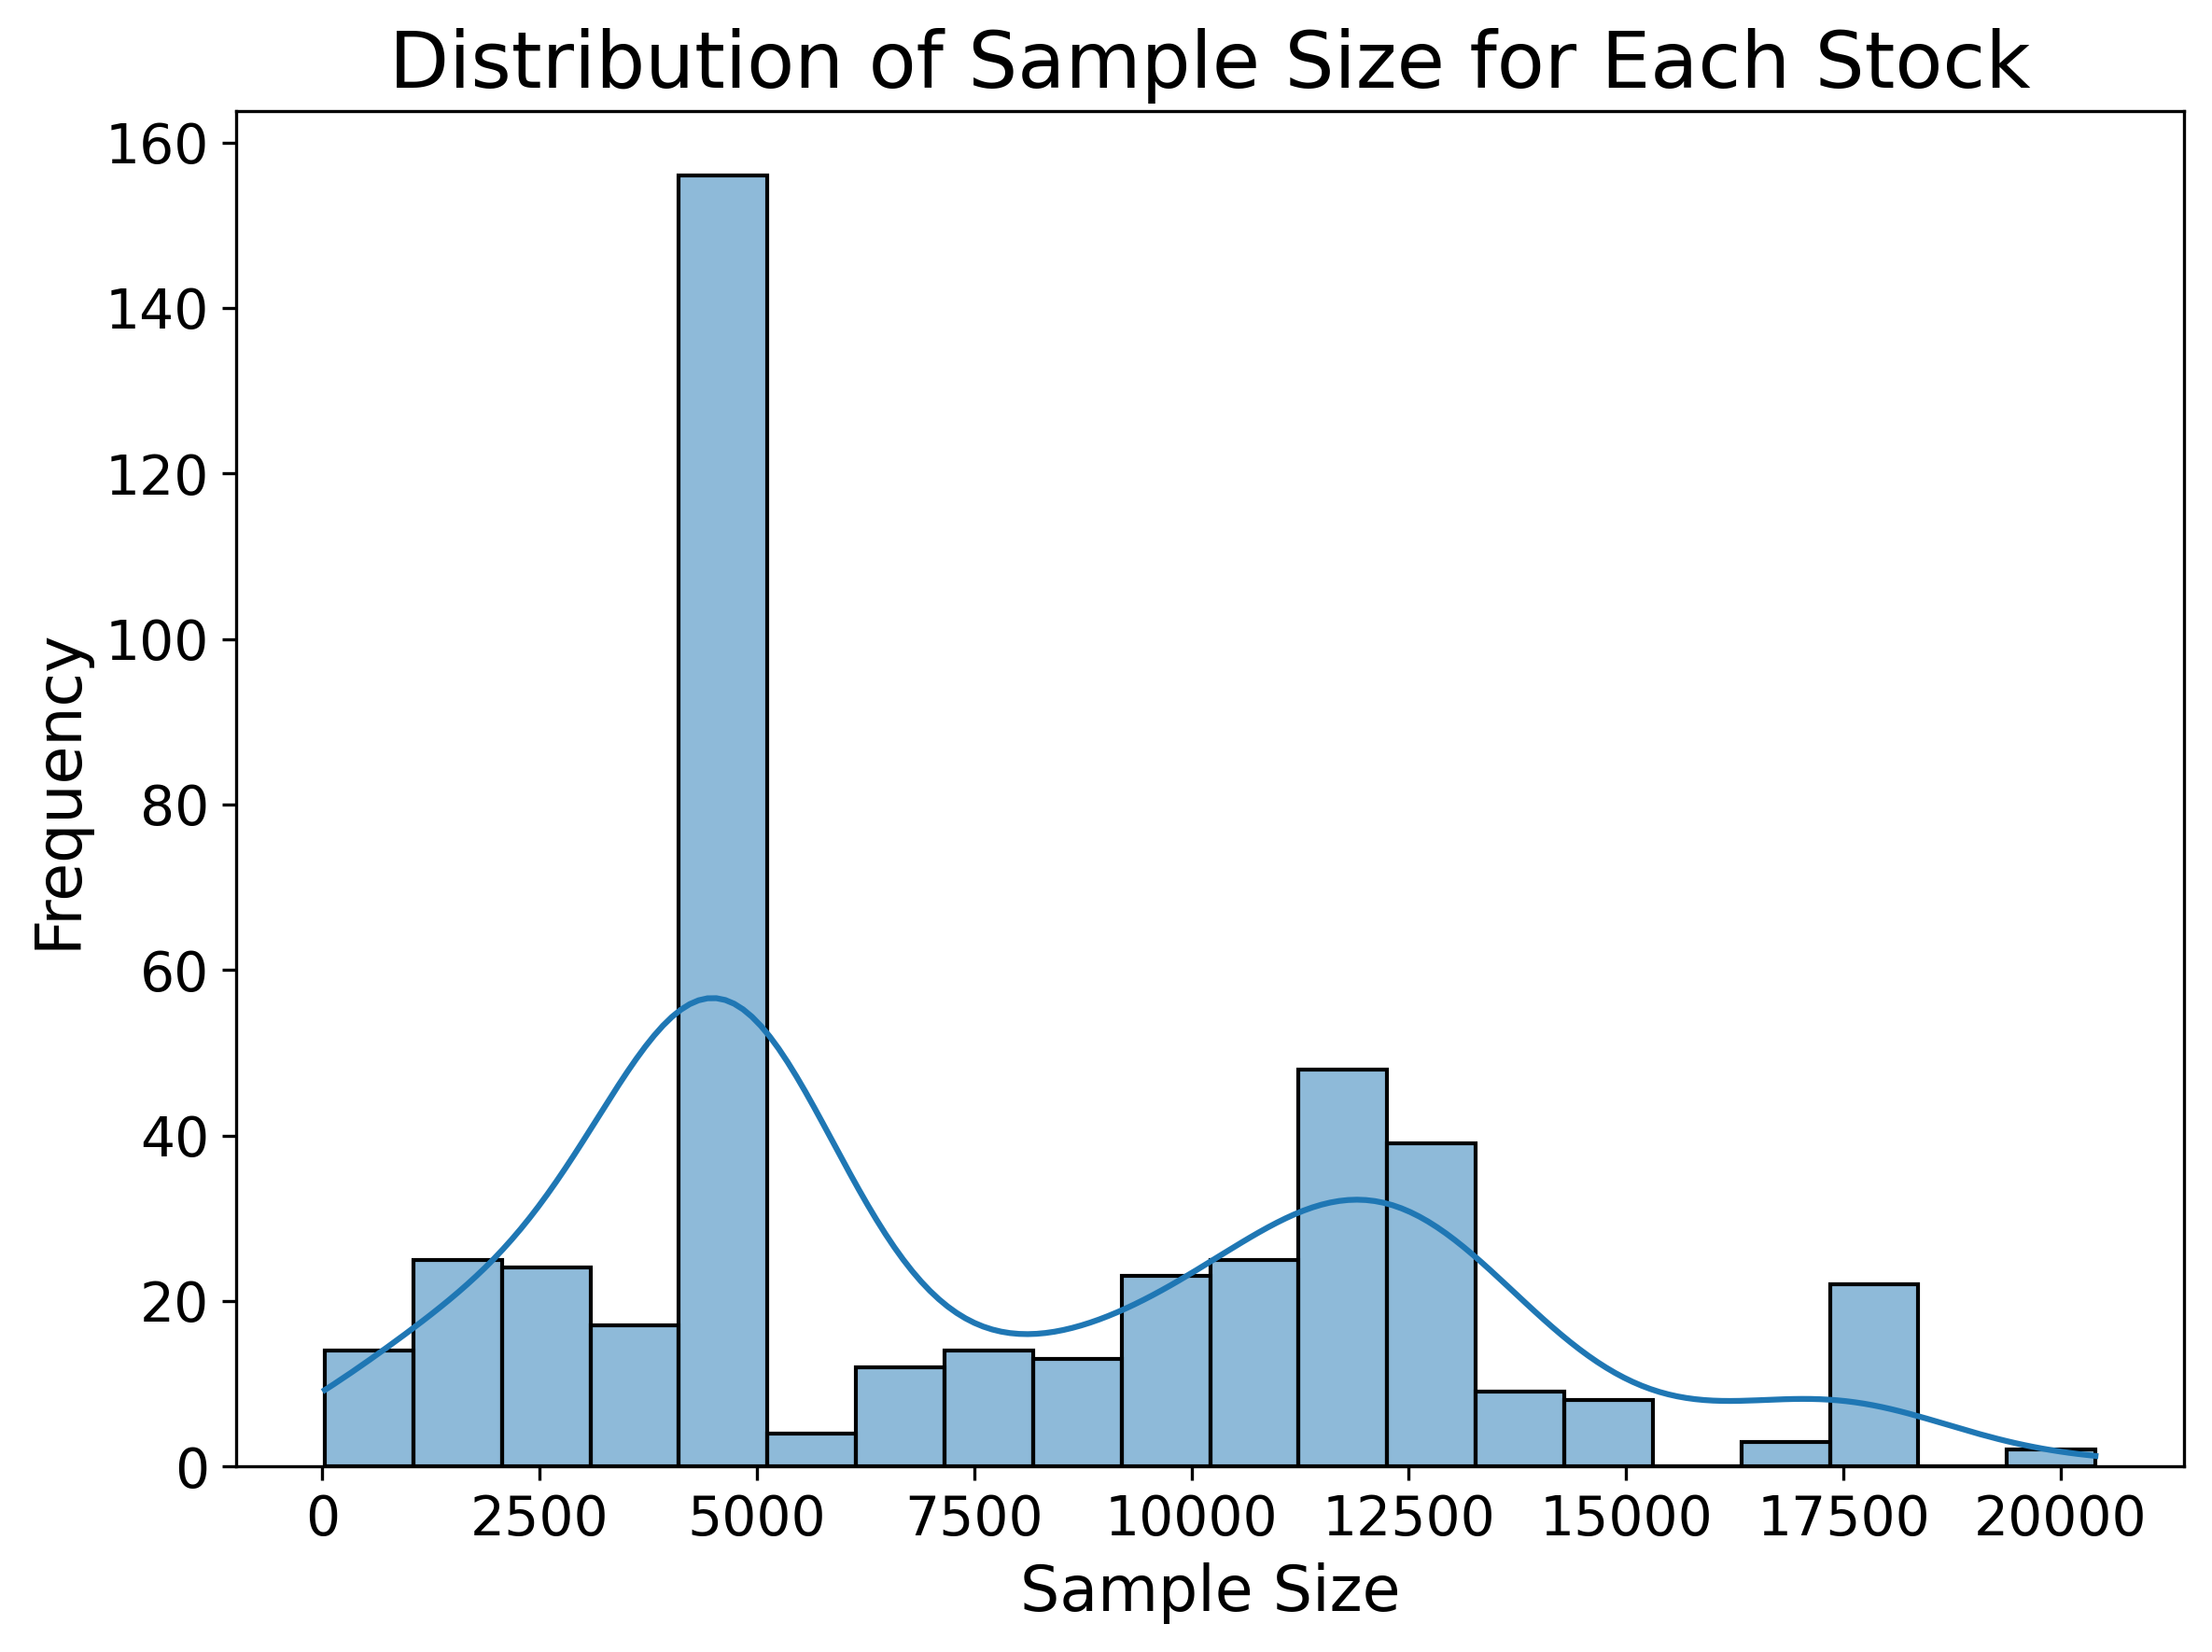

In [110]:
fig, ax = plt.subplots(figsize=(8, 6), dpi = 300)
sns.histplot(summary_df['sample_size'], bins=20, kde=True, ax=ax)
plt.title('Distribution of Sample Size for Each Stock', fontsize = 20)
plt.xlabel('Sample Size', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('../figures/sample_size_distribution.png')
plt.show()

# ### boxplot
# fig, ax = plt.subplots(figsize=(8, 6), dpi = 300)
# sns.boxplot(x=summary_df['sample_size'], ax=ax)
# plt.title('Boxplot of Sample Size for Each Stock')
# plt.xlabel('Sample Size')
# plt.show()

In [ ]:
pd.DataFrame({"univ": summary_df[(summary_df['sample_size']>=1260)]['symbol'].tolist()}).to_parquet('../Data/univs/SP500_Clean.pq')

### check whether a stock is not continus in time